## Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Load Cifar10 Dataset from keras

In [2]:
from tensorflow import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape) 
print(y_test.shape) 

170498071/170498071 [==============================] - 62s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
cifar_label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(-0.5, 31.5, 31.5, -0.5)

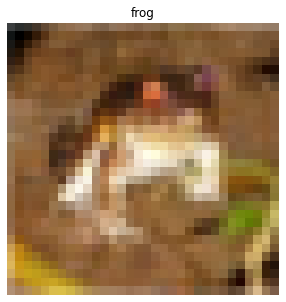

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.title(cifar_label[y_train[0][0]])
plt.axis('off')

## Train Model With ANN

### Flatten Data and Normalize it

In [5]:
X_train_norm = X_train.reshape(-1,32*32*3) / 255
X_test_norm = X_test.reshape(-1,32*32*3) / 255

In [6]:
print(X_train_norm.shape)
print(X_test_norm.shape)

(50000, 3072)
(10000, 3072)


### Create ANN Model

In [7]:
from keras.layers import Dense
from keras.models import Sequential
model = Sequential(
    [
        Dense(512, input_dim=X_train_norm.shape[-1], activation='relu', name='Input'),
        Dense(512, activation='relu', name='layer1'),
        Dense(1024, activation='relu', name='layer2'),
        Dense(10, activation='softmax', name='output')
    ],
    name='ANN_Model'
)
model.summary()

Model: "ANN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 512)               1573376   
                                                                 
 layer1 (Dense)              (None, 512)               262656    
                                                                 
 layer2 (Dense)              (None, 1024)              525312    
                                                                 
 output (Dense)              (None, 10)                10250     
                                                                 
Total params: 2,371,594
Trainable params: 2,371,594
Non-trainable params: 0
_________________________________________________________________


### Plot Model

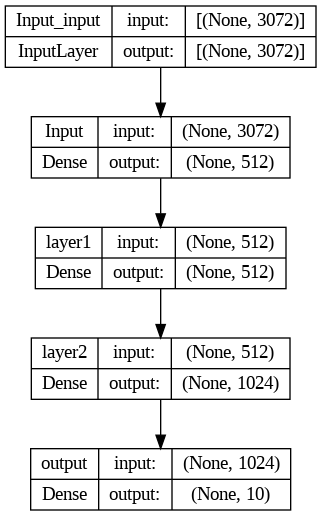

In [8]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Compile and Fit Model

For loss function We can use different types:

- Categorical Cross-Entropy
- Sparse Categorical Cross-Entropy
- Binary Cross-Entropy

Binary Cross-Entropy: If our classification is between 2 classes We use this.

Sparse Categorical Cross-Entropy: If our classification is between more than 2 classes and our targets are integer number, We use this.

Categorical Cross-Entropy: If our classification is between more than 2 classes and our targets are like One-hot encoding, We use this.

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=30, verbose=2, validation_data=(X_test_norm, y_test))

Epoch 1/30
782/782 - 10s - loss: 1.8302 - accuracy: 0.3341 - val_loss: 1.7181 - val_accuracy: 0.3807 - 10s/epoch - 13ms/step
Epoch 2/30
782/782 - 3s - loss: 1.6577 - accuracy: 0.4047 - val_loss: 1.5906 - val_accuracy: 0.4217 - 3s/epoch - 3ms/step
Epoch 3/30
782/782 - 3s - loss: 1.5693 - accuracy: 0.4359 - val_loss: 1.5396 - val_accuracy: 0.4476 - 3s/epoch - 4ms/step
Epoch 4/30
782/782 - 3s - loss: 1.5091 - accuracy: 0.4591 - val_loss: 1.5373 - val_accuracy: 0.4515 - 3s/epoch - 4ms/step
Epoch 5/30
782/782 - 3s - loss: 1.4600 - accuracy: 0.4754 - val_loss: 1.4753 - val_accuracy: 0.4778 - 3s/epoch - 4ms/step
Epoch 6/30
782/782 - 3s - loss: 1.4176 - accuracy: 0.4925 - val_loss: 1.4679 - val_accuracy: 0.4864 - 3s/epoch - 4ms/step
Epoch 7/30
782/782 - 3s - loss: 1.3837 - accuracy: 0.5032 - val_loss: 1.4527 - val_accuracy: 0.4866 - 3s/epoch - 4ms/step
Epoch 8/30
782/782 - 3s - loss: 1.3492 - accuracy: 0.5150 - val_loss: 1.4621 - val_accuracy: 0.4842 - 3s/epoch - 4ms/step
Epoch 9/30
782/782 - 

### Plot Model Loss

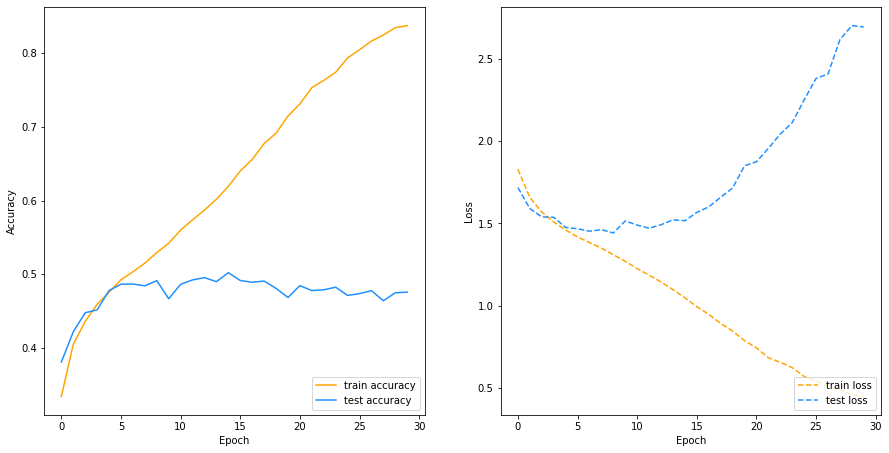

In [10]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

### Measure Accuracy

In [11]:
loss, accuracy = model.evaluate(X_test_norm, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.6951 - accuracy: 0.4756
Accuracy: 47.56


## Train With CNN

In [12]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

Note that We just want to see the difference between ANN and CNN. For better results, You can add more layers to your model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
model = Sequential(
    [
        Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', name='Input'),
        Conv2D(32, (3,3), activation='relu', name='Conv1'),
        Conv2D(32, (3,3), activation='relu', name='Conv2'),
        MaxPool2D((2,2), name='MaxPooling'),
        Flatten(name='Flatten'),
        Dense(64, activation='relu', name='Layer1'),
        Dense(32, activation='relu', name='Layer2'),
        Dense(10, activation='softmax', name='Output'),
    ],
    name='CNN_Model'
)
model.summary()

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 Conv1 (Conv2D)              (None, 28, 28, 32)        9248      
                                                                 
 Conv2 (Conv2D)              (None, 26, 26, 32)        9248      
                                                                 
 MaxPooling (MaxPooling2D)   (None, 13, 13, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 5408)              0         
                                                                 
 Layer1 (Dense)              (None, 64)                346176    
                                                                 
 Layer2 (Dense)              (None, 32)                20

#### Plot Model

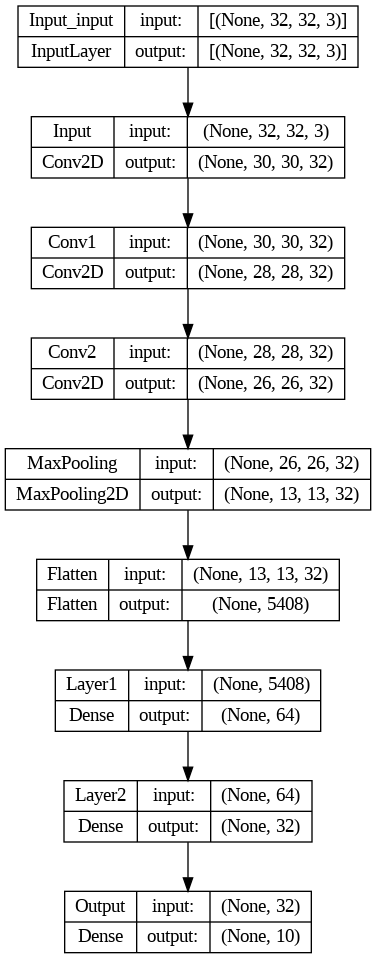

In [14]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

#### Compile and Fit Mdeol

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=30, verbose=2, validation_data=(X_test_norm, y_test))

Epoch 1/30
782/782 - 13s - loss: 1.6033 - accuracy: 0.4137 - val_loss: 1.3429 - val_accuracy: 0.5225 - 13s/epoch - 16ms/step
Epoch 2/30
782/782 - 5s - loss: 1.1978 - accuracy: 0.5709 - val_loss: 1.0993 - val_accuracy: 0.6069 - 5s/epoch - 6ms/step
Epoch 3/30
782/782 - 5s - loss: 1.0256 - accuracy: 0.6380 - val_loss: 1.0202 - val_accuracy: 0.6416 - 5s/epoch - 6ms/step
Epoch 4/30
782/782 - 6s - loss: 0.9320 - accuracy: 0.6723 - val_loss: 1.0299 - val_accuracy: 0.6426 - 6s/epoch - 8ms/step
Epoch 5/30
782/782 - 5s - loss: 0.8558 - accuracy: 0.6998 - val_loss: 1.0098 - val_accuracy: 0.6449 - 5s/epoch - 6ms/step
Epoch 6/30
782/782 - 5s - loss: 0.7984 - accuracy: 0.7192 - val_loss: 0.9765 - val_accuracy: 0.6674 - 5s/epoch - 6ms/step
Epoch 7/30
782/782 - 5s - loss: 0.7451 - accuracy: 0.7384 - val_loss: 0.9657 - val_accuracy: 0.6709 - 5s/epoch - 6ms/step
Epoch 8/30
782/782 - 4s - loss: 0.6883 - accuracy: 0.7565 - val_loss: 1.0030 - val_accuracy: 0.6604 - 4s/epoch - 6ms/step
Epoch 9/30
782/782 - 

#### Plot Loss and Val Loss 

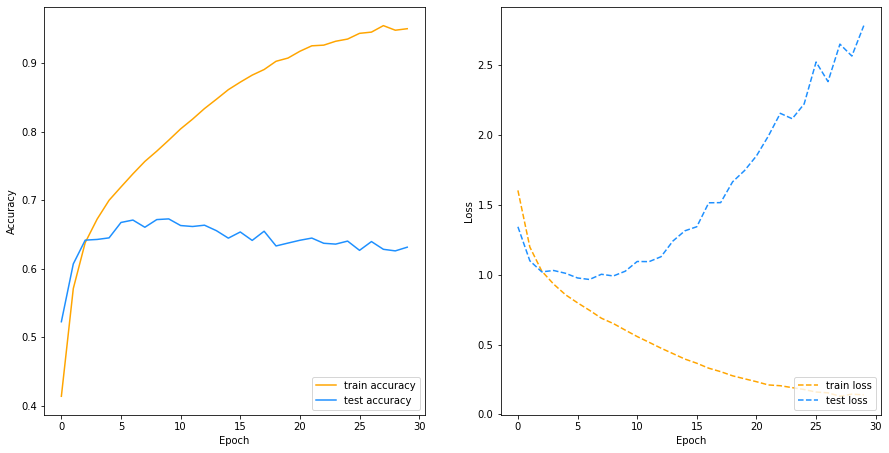

In [16]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

#### Measure Accuracy

In [17]:
loss, accuracy = model.evaluate(X_test_norm, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 2.7829 - accuracy: 0.6313
Accuracy: 63.13


#### Predict

In [18]:
y_pred_cnn = model.predict(X_test_norm)

313/313 [==============================] - 1s 3ms/step


#### Show Prediction

In [19]:
def gridshow(x, y, yp, n=5, mislabel=False):
  if mislabel:
    wrong_lable = np.where(yp != y)[0]
    grid = np.random.choice(wrong_lable, n**2)
    grid = grid.reshape(n, n)
  else:
    grid = np.random.randint(0, len(x), size=(n,n))

  fig, ax = plt.subplots(nrows=n, ncols=n, figsize=(2*n, 2*n))
  for i in range(n):
    for j in range(n):
      ax[i][j].imshow(x[grid[i,j]], cmap='gray')
      ax[i][j].axis('off')
      label = cifar_label[y[grid[i][j]][0]] + '|' + cifar_label[yp[grid[i][j]]]
      ax[i][j].set_title(label)

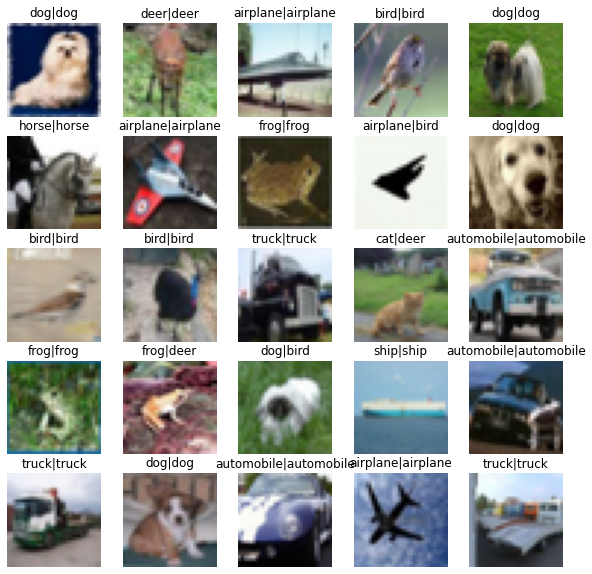

In [20]:
gridshow(X_test, y_test, np.argmax(y_pred_cnn, axis=1))

## Improve Our CNN Model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
model = Sequential(
    [
        # Feature Extraction
        # 1st Block
        Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', padding='same', kernel_initializer='he_uniform', name='Input'),
        Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'),
        MaxPool2D((2,2)),
        Dropout(0.2),
     
        # 2nd Block
        Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'),
        Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'),
        MaxPool2D((2,2)),
        Dropout(0.2),
     
        # 3rd Block
        Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'),
        Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'),
        MaxPool2D((2,2)),
        Dropout(0.2),
     
        # Fully Connected
        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_uniform'),        
        Dense(10, activation='softmax', kernel_initializer='he_uniform', name='Output')
    ],
    name='CNN_Improved_Model'
)
model.summary()

Model: "CNN_Improved_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                

### Plot New Model

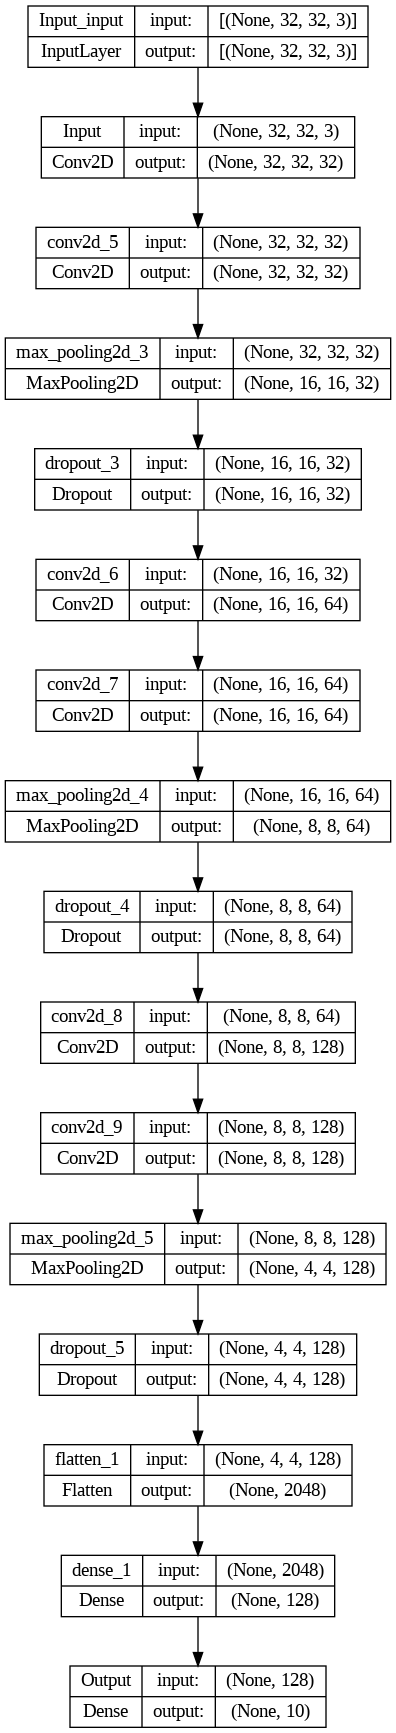

In [24]:
from keras import utils
utils.plot_model(model, show_shapes=True, show_layer_names=True)

### Compile and Fit

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=30, verbose=2, validation_data=(X_test_norm, y_test))

Epoch 1/30
782/782 - 11s - loss: 1.6286 - accuracy: 0.3992 - val_loss: 1.2219 - val_accuracy: 0.5568 - 11s/epoch - 14ms/step
Epoch 2/30
782/782 - 8s - loss: 1.1399 - accuracy: 0.5945 - val_loss: 0.9878 - val_accuracy: 0.6436 - 8s/epoch - 10ms/step
Epoch 3/30
782/782 - 7s - loss: 0.9290 - accuracy: 0.6716 - val_loss: 0.9012 - val_accuracy: 0.6835 - 7s/epoch - 9ms/step
Epoch 4/30
782/782 - 7s - loss: 0.8046 - accuracy: 0.7141 - val_loss: 0.7426 - val_accuracy: 0.7395 - 7s/epoch - 9ms/step
Epoch 5/30
782/782 - 7s - loss: 0.7084 - accuracy: 0.7511 - val_loss: 0.6953 - val_accuracy: 0.7588 - 7s/epoch - 9ms/step
Epoch 6/30
782/782 - 7s - loss: 0.6412 - accuracy: 0.7747 - val_loss: 0.6991 - val_accuracy: 0.7633 - 7s/epoch - 9ms/step
Epoch 7/30
782/782 - 7s - loss: 0.5920 - accuracy: 0.7907 - val_loss: 0.6612 - val_accuracy: 0.7725 - 7s/epoch - 9ms/step
Epoch 8/30
782/782 - 7s - loss: 0.5464 - accuracy: 0.8086 - val_loss: 0.6198 - val_accuracy: 0.7848 - 7s/epoch - 9ms/step
Epoch 9/30
782/782 -

### Plot Loss and Val Loss

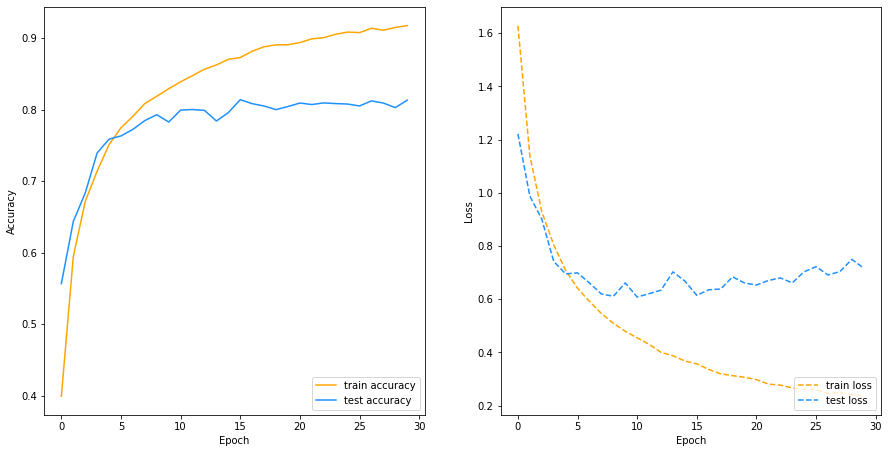

In [26]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],
         label='train accuracy',
         c='orange', ls='-')
plt.plot(history.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='-')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'],
         label='train loss',
         c='orange', ls='--')
plt.plot(history.history['val_loss'],
         label='test loss',
         c='dodgerblue', ls='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

### Measure Accuracy

In [27]:
loss, accuracy = model.evaluate(X_test_norm, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.7169 - accuracy: 0.8133
Accuracy: 81.33


### Predict

In [28]:
y_pred_cnn = model.predict(X_test_norm)

313/313 [==============================] - 1s 4ms/step


### Show Predictions

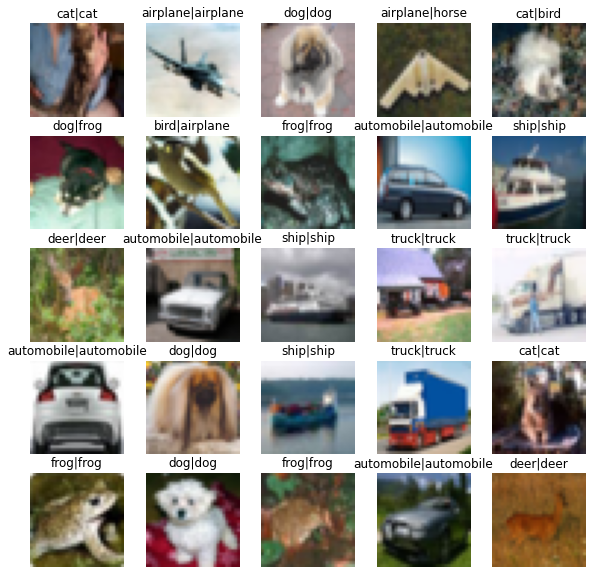

In [29]:
gridshow(X_test, y_test, np.argmax(y_pred_cnn, axis=1))